In [84]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pyodbc


In [85]:
# create connection
driver = '{ODBC Driver 17 for SQL Server}'
server = 'IS-HAY10.ischool.uw.edu'
port = '1433'
database = 'INFO_430_Proj_07'
username = 'Info430'
password = 'HappyHusky!'
conn = pyodbc.connect(f'DRIVER={driver};SERVER={server},{port};DATABASE={database};UID={username};PWD={password}')


In [86]:
# start executing statements
command = '''SELECT T.Price,TT.TicketTypeName FROM tblTICKET T JOIN tblTICKET_TYPE TT ON TT.TicketTypeID = T.TicketTypeID'''
df = pd.read_sql_query(command, conn)
df['Price'] /= 1000  # convert to thousands of dollars

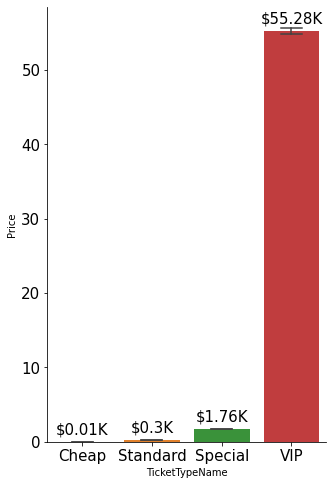

In [106]:
order = ['Cheap', 'Standard', 'Special', 'VIP']
fig,ax = plt.subplots(figsize=[5,8])
sns.barplot(x='TicketTypeName', y='Price', data=df, ci=95, ax=ax, order=order, errwidth=1.5, capsize=0.3)
for idx,cat in enumerate(order):
    vmean = df.loc[df['TicketTypeName']==cat,'Price'].mean()
    ax.text(idx,vmean + 1,f'${round(vmean,2)}K', ha='center', fontsize=15)
ax.tick_params(labelsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

([<matplotlib.patches.Wedge at 0x7f83066a1ad0>,
 [Text(1.0999998008289762, 0.0006619487991600364, ''),
  Text(1.0947824634553678, 0.10701101677208927, ''),
  Text(1.0758118065450308, 0.22941001917596635, ''),
  Text(-1.092952028951563, -0.12432160878407965, '')])

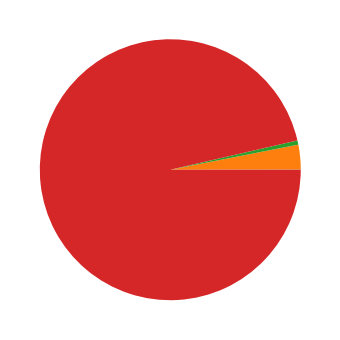

In [107]:
order = ['Cheap', 'Standard', 'Special', 'VIP']
fig,ax = plt.subplots(figsize=[6,6])
data = df.groupby('TicketTypeName').mean()
ax.pie(data['Price'])

In [108]:
# start executing statements
command = '''SELECT CT.CustomerTypeName, SUM(T.Price) AS Price
FROM tblTICKET T
JOIN tblTICKET_TYPE TT ON TT.TicketTypeID = T.TicketTypeID
JOIN tblCUSTOMER C ON C.CustomerID = T.CustomerID
JOIN tblCUSTOMER_TYPE CT ON CT.CustomerTypeID = C.CustomerTypeID
JOIN tblCONCERT CC ON CC.ConcertID = T.ConcertID
JOIN tblCONCERT_TYPE CCT ON CCT.ConcertTypeID = CC.ConcertTypeID
JOIN tblVENUE V ON V.VenueID = CC.VenueID
JOIN tblVENUE_TYPE VT ON VT.VenueTypeID = V.VenueTypeID
WHERE TT.TicketTypeName = 'VIP'
GROUP BY CT.CustomerTypeID, CT.CustomerTypeName'''
df = pd.read_sql_query(command, conn)
df = df.set_index('CustomerTypeName')['Price']

In [109]:
df

CustomerTypeName
Stakeholder    2.333776e+08
Standard       2.306981e+08
VIP            2.154213e+08
Name: Price, dtype: float64

([<matplotlib.patches.Wedge at 0x7f8307832350>,
 [Text(-0.9696347231864341, 0.519430942081012, ''),
  Text(0.09121648296016964, -1.0962114546183037, ''),
  Text(0.9232217864387899, 0.5980481026178158, '')])

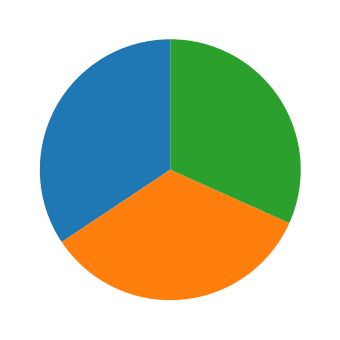

In [110]:
palette = {'Stakeholder':'tab:blue','Standard':'tab:orange','VIP':'tab:green'}
fig,ax = plt.subplots(figsize=[6,6])
ax.pie(df, colors=palette.values(), startangle=90)

In [113]:
# start executing statements
command = '''SELECT CCT.ConcertTypeName, SUM(T.Price) AS Price
FROM tblTICKET T
JOIN tblTICKET_TYPE TT ON TT.TicketTypeID = T.TicketTypeID
JOIN tblCUSTOMER C ON C.CustomerID = T.CustomerID
JOIN tblCUSTOMER_TYPE CT ON CT.CustomerTypeID = C.CustomerTypeID
JOIN tblCONCERT CC ON CC.ConcertID = T.ConcertID
JOIN tblCONCERT_TYPE CCT ON CCT.ConcertTypeID = CC.ConcertTypeID
JOIN tblVENUE V ON V.VenueID = CC.VenueID
JOIN tblVENUE_TYPE VT ON VT.VenueTypeID = V.VenueTypeID
WHERE TT.TicketTypeName = 'VIP'
GROUP BY CCT.ConcertTypeID, CCT.ConcertTypeName'''
df = pd.read_sql_query(command, conn)
df = df.set_index('ConcertTypeName')['Price']

([<matplotlib.patches.Wedge at 0x7f83074fc090>,
 [Text(-0.40216432821340303, 1.0238475731829726, ''),
  Text(-1.0046551453797004, 0.44795986300347634, ''),
  Text(-1.0294498463242894, -0.3875990375412421, ''),
  Text(-0.48213723513870715, -0.9887080896264595, ''),
  Text(0.34467520461566514, -1.044604711516825, ''),
  Text(0.9846929005636188, -0.49028552046701046, ''),
  Text(1.0206530613761216, 0.41020400815149405, ''),
  Text(0.3990579775054453, 1.0250623057108594, '')])

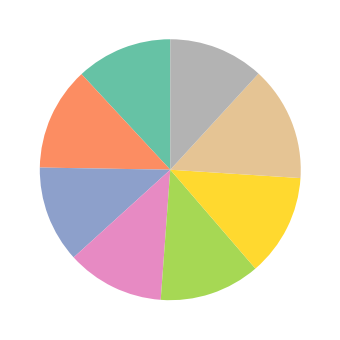

In [115]:
# palette = {'Stakeholder':'tab:blue','Standard':'tab:orange','VIP':'tab:green'}
fig,ax = plt.subplots(figsize=[6,6])
ax.pie(df, colors=sns.color_palette('Set2'), startangle=90)

In [117]:
# start executing statements
command = '''SELECT VT.VenueTypeName, CT.CustomerTypeName, CCT.ConcertTypeName, SUM(T.Price) AS Price
FROM tblTICKET T
JOIN tblTICKET_TYPE TT ON TT.TicketTypeID = T.TicketTypeID
JOIN tblCUSTOMER C ON C.CustomerID = T.CustomerID
JOIN tblCUSTOMER_TYPE CT ON CT.CustomerTypeID = C.CustomerTypeID
JOIN tblCONCERT CC ON CC.ConcertID = T.ConcertID
JOIN tblCONCERT_TYPE CCT ON CCT.ConcertTypeID = CC.ConcertTypeID
JOIN tblVENUE V ON V.VenueID = CC.VenueID
JOIN tblVENUE_TYPE VT ON VT.VenueTypeID = V.VenueTypeID
WHERE TT.TicketTypeName = 'VIP'
GROUP BY VT.VenueTypeID, VT.VenueTypeName, CT.CustomerTypeID, CT.CustomerTypeName, CCT.ConcertTypeID, CCT.ConcertTypeName'''
df = pd.read_sql_query(command, conn)


<AxesSubplot:>

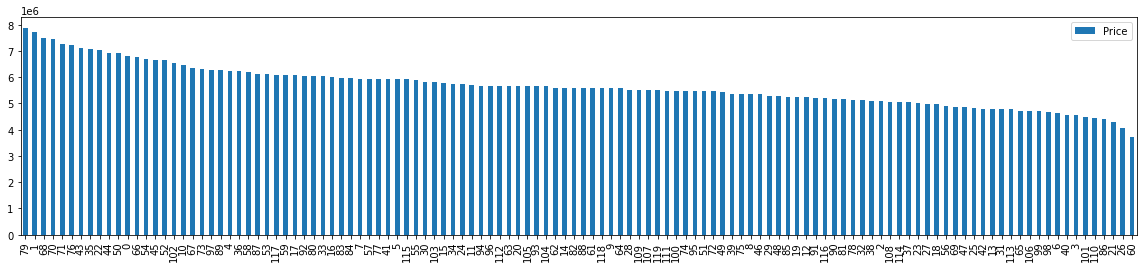

In [118]:
fig,ax = plt.subplots(figsize=[20,4])
df.sort_values('Price', ascending=False).plot.bar(ax=ax)

In [119]:
df.sort_values('Price', ascending=False)

,VenueTypeName,CustomerTypeName,ConcertTypeName,Price
79,Stadium,Stakeholder,Regional,7893165.92
1,Club/Bar/Pub,Stakeholder,Neighborhood,7713117.38
68,Hotel,Stakeholder,Neighborhood,7496269.39
70,Hotel,Stakeholder,State,7459641.16
71,Community Center,VIP,National,7249441.02
...,...,...,...,...
110,Club/Bar/Pub,Stakeholder,National,4464900.23
86,Community Center,VIP,City,4391171.07
21,Stadium,Standard,State,4298645.73
26,Community Center,VIP,Regional,4065907.81


In [263]:
command = '''SELECT C.CustomerID, VT.VenueTypeName, CCT.ConcertTypeName, TT.TicketTypeName, SUM(T.Price) AS TicketPrice
FROM tblTICKET T
JOIN tblTICKET_TYPE TT ON TT.TicketTypeID = T.TicketTypeID
JOIN tblCUSTOMER C ON C.CustomerID = T.CustomerID
JOIN tblCONCERT CC ON CC.ConcertID = T.ConcertID
JOIN tblCONCERT_TYPE CCT ON CCT.ConcertTypeID = CC.ConcertTypeID
JOIN tblVENUE V ON V.VenueID = CC.VenueID
JOIN tblVENUE_TYPE VT ON VT.VenueTypeID = V.VenueTypeID
WHERE TT.TicketTypeName = 'VIP'
GROUP BY C.CustomerID, TT.TicketTypeID, TT.TicketTypeName, VT.VenueTypeID, VT.VenueTypeName, CCT.ConcertTypeID, CCT.ConcertTypeName'''
src = pd.read_sql_query(command, conn)


In [264]:
df = src.pivot_table(index='CustomerID', aggfunc=np.sum,
                     columns=['VenueTypeName', 'ConcertTypeName', 'TicketTypeName'],
                     values=['TicketPrice']).fillna(0)
df.columns = [' '.join(col) for col in df.columns]


In [265]:
command = '''SELECT C.CustomerID, PT.ProductTypeName, VT.VenueTypeName, CCT.ConcertTypeName, TT.TicketTypeName, SUM(P.ProductCurrentPrice) AS ProductPrice
FROM tblTICKET T
JOIN tblTICKET_TYPE TT ON TT.TicketTypeID = T.TicketTypeID
JOIN tblCUSTOMER C ON C.CustomerID = T.CustomerID
JOIN tblTICKET_PRODUCT TP ON TP.TicketID = T.TicketID
JOIN tblPRODUCT P ON P.ProductID = TP.ProductID
JOIN tblPRODUCT_TYPE PT ON PT.ProductTypeID = P.ProductTypeID
JOIN tblCUSTOMER_TYPE CT ON CT.CustomerTypeID = C.CustomerTypeID
JOIN tblCONCERT CC ON CC.ConcertID = T.ConcertID
JOIN tblCONCERT_TYPE CCT ON CCT.ConcertTypeID = CC.ConcertTypeID
JOIN tblVENUE V ON V.VenueID = CC.VenueID
JOIN tblVENUE_TYPE VT ON VT.VenueTypeID = V.VenueTypeID
WHERE TT.TicketTypeName = 'VIP'
GROUP BY C.CustomerID, TT.TicketTypeID, TT.TicketTypeName, VT.VenueTypeID, VT.VenueTypeName, CCT.ConcertTypeID, CCT.ConcertTypeName, PT.ProductTypeID, PT.ProductTypeName'''
src2 = pd.read_sql_query(command, conn)


In [267]:
df2 = src2.pivot_table(index='CustomerID', aggfunc=np.sum,
                      columns=['VenueTypeName', 'ConcertTypeName', 'TicketTypeName', 'ProductTypeName'],
                      values=['ProductPrice']).fillna(0)
df2.columns = [' '.join(col) for col in df2.columns]


In [268]:
import scanpy as sc
from anndata import AnnData
adata = AnnData(pd.concat([df,df2], axis=1).fillna(0))
sc.pp.log1p(adata)
sc.tl.pca(adata)


/Users/danielgchen/anaconda3/envs/base_py37/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [270]:
# add numerical observations
adata.obs['TicketPrice'] = src.groupby('CustomerID').mean()['TicketPrice'].reindex(adata.obs_names.astype(int)).values
adata.obs['ProductPrice'] = src2.groupby('CustomerID').mean()['ProductPrice'].reindex(adata.obs_names.astype(int)).values
for cat in ['ConcertTypeName', 'VenueTypeName']:
    tmp = src.groupby(['CustomerID',cat]).mean().reset_index().set_index('CustomerID')
    for name in tmp[cat].unique():
        adata.obs[f'{name}Price'] = tmp.loc[tmp[cat]==name,'TicketPrice'].reindex(adata.obs_names.astype(int)).fillna(0).values
for cat in ['ProductTypeName']:
    tmp = src2.groupby(['CustomerID',cat]).mean().reset_index().set_index('CustomerID')
    for name in tmp[cat].unique():
        adata.obs[f'{name}Price'] = tmp.loc[tmp[cat]==name,'ProductPrice'].reindex(adata.obs_names.astype(int)).fillna(0).values
        

In [271]:
# add categorical observations / customer based observations
command = '''SELECT C.CustomerID, CT.CustomerTypeName, C.CustomerDOB
FROM tblCUSTOMER C
JOIN tblCUSTOMER_TYPE CT ON CT.CustomerTypeID = C.CustomerTypeID'''
anno = pd.read_sql_query(command, conn).set_index('CustomerID')
anno.index = anno.index.astype(str)
assert anno.index.shape == anno.index.unique().shape
for idx in anno.index:
    year = anno.loc[idx,'CustomerDOB'].year
    if(year % 4 == 0):
        year += anno.loc[idx,'CustomerDOB'].timetuple().tm_yday / 366
    else:
        year += anno.loc[idx,'CustomerDOB'].timetuple().tm_yday / 365
    anno.loc[idx,'CustomerDOB'] = year
anno['CustomerDOB'] = anno['CustomerDOB'].astype(float)
adata.obs[anno.columns] = anno


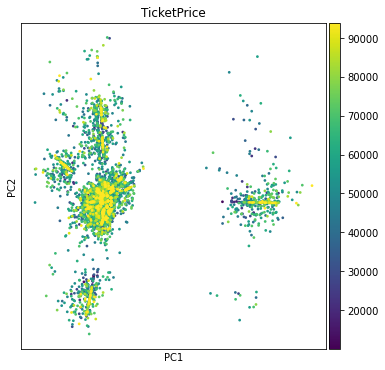

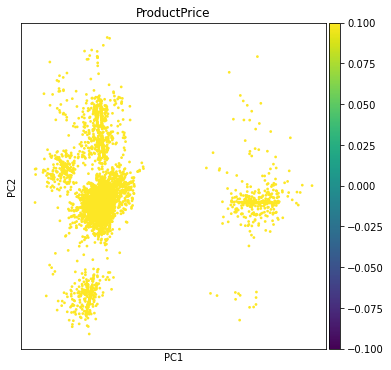

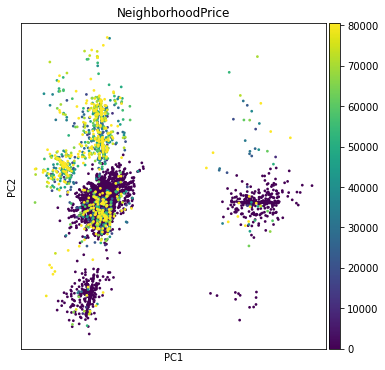

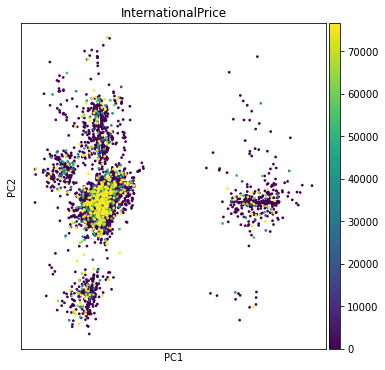

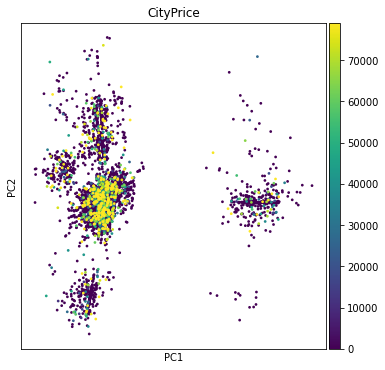

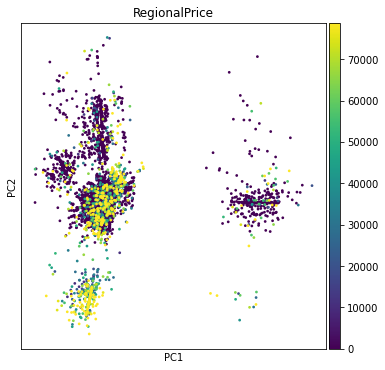

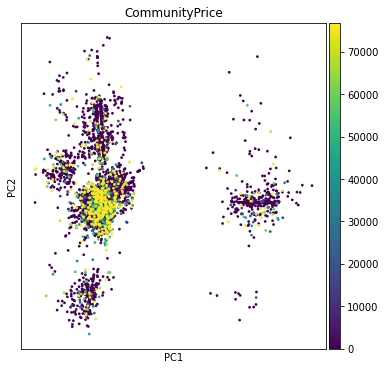

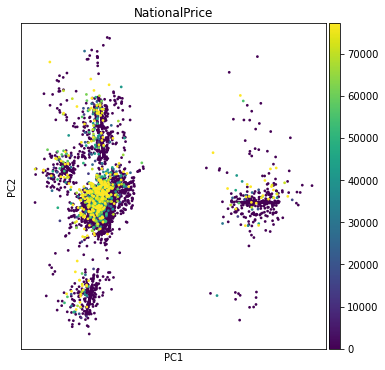

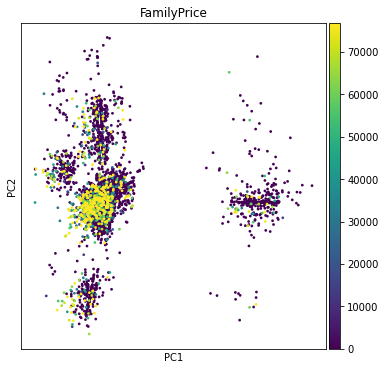

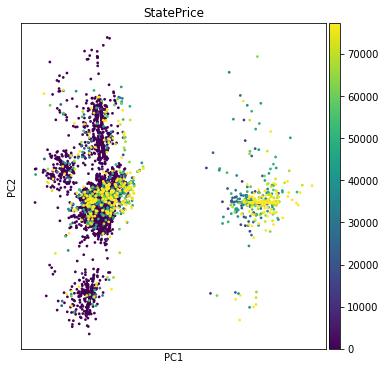

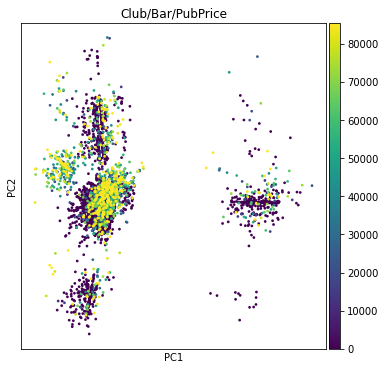

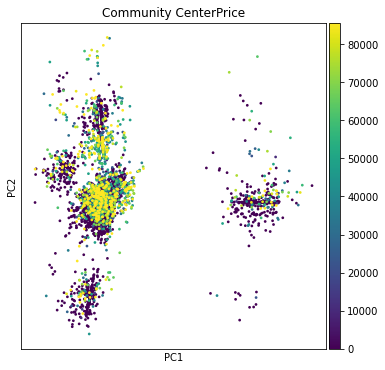

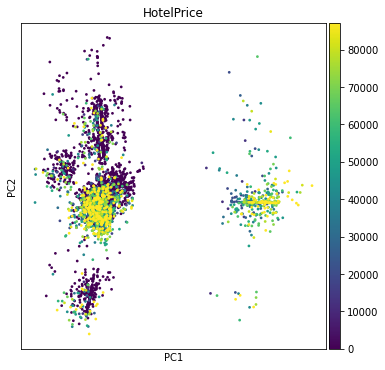

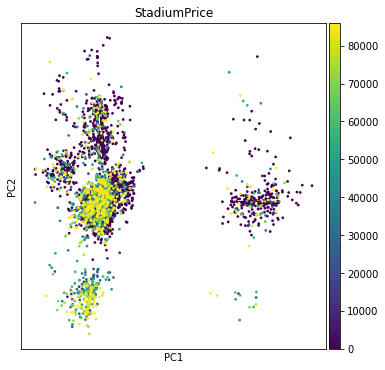

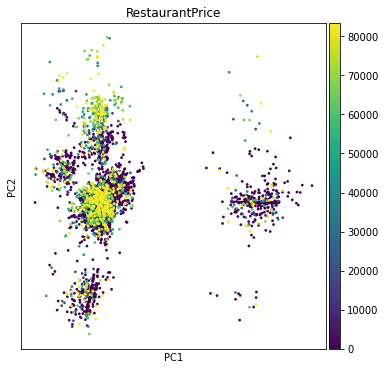

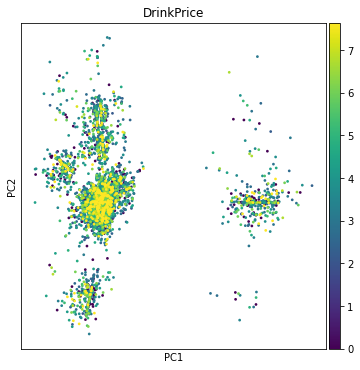

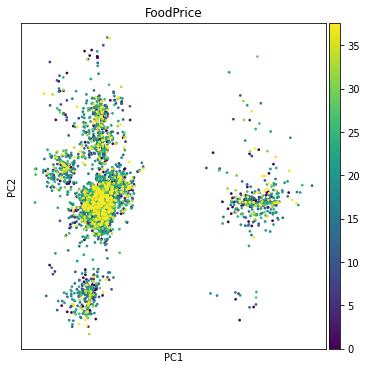

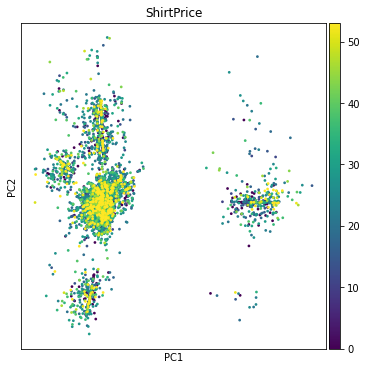

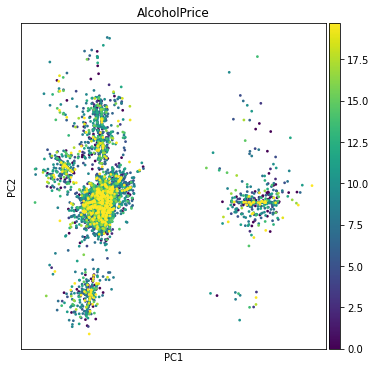

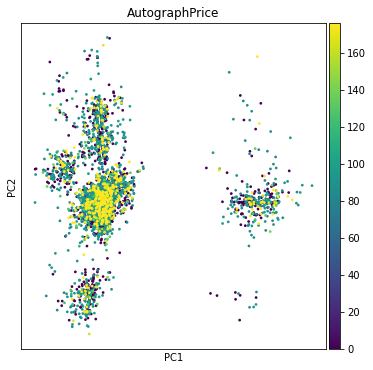

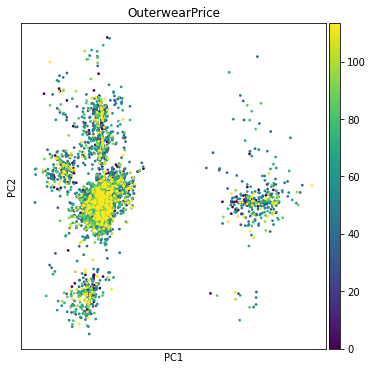

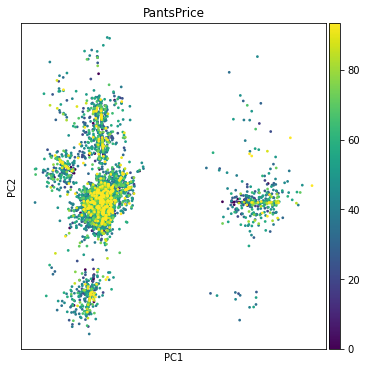

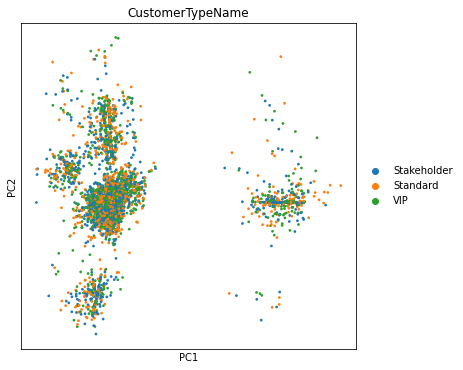

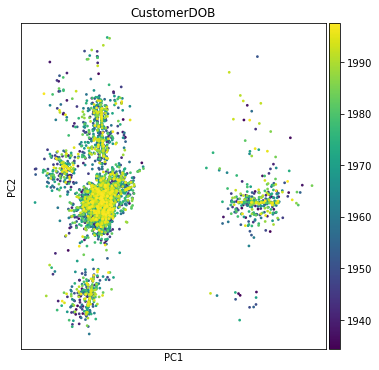

In [293]:
# plot the columns
for col in adata.obs.columns[:-anno.columns.shape[0]]:
    fig,ax = plt.subplots(figsize=[6,6])
    vmax = np.quantile(sc.get.obs_df(adata, keys=[col])[col], q=0.95)
    sc.pl.pca(adata, color=[col], ax=ax, s=30, vmax=vmax, cmap='viridis')
    ax.set_facecolor('k')
# plot the columns
for col in anno.columns:
    fig,ax = plt.subplots(figsize=[6,6])
    sc.pl.pca(adata, color=[col], ax=ax, s=30)

In [274]:
# look at other visualizations
sc.tl.tsne(adata)
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')
sc.tl.diffmap(adata)
sc.tl.umap(adata)
sc.tl.draw_graph(adata)


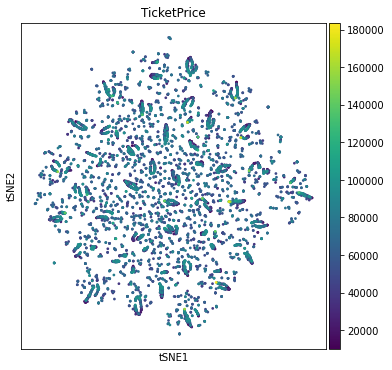

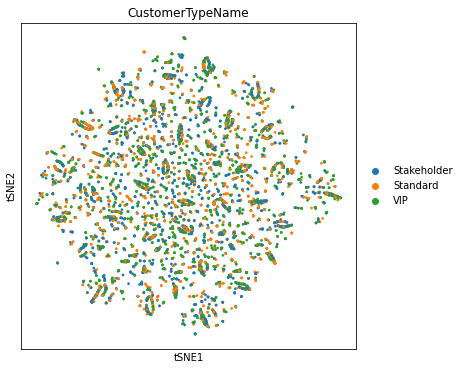

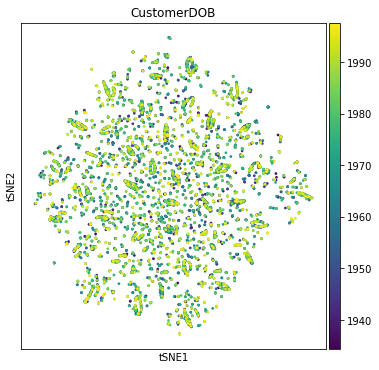

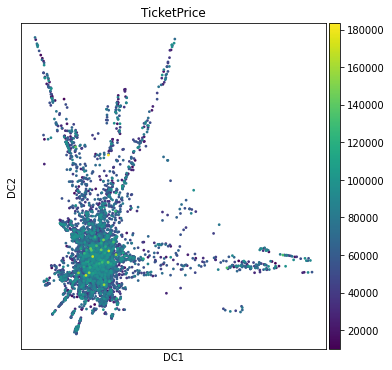

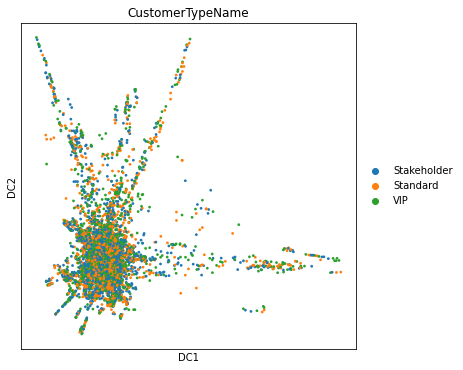

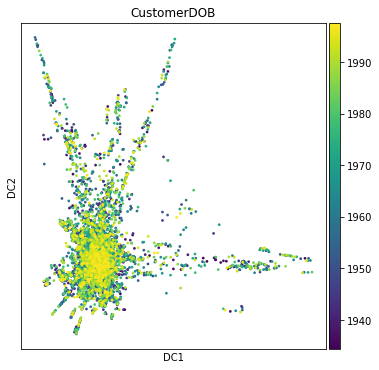

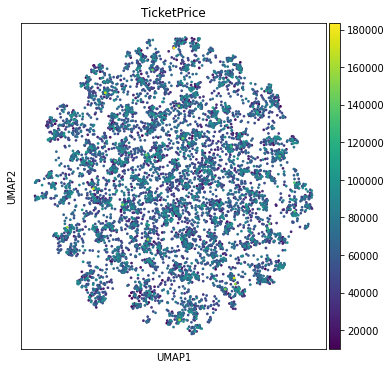

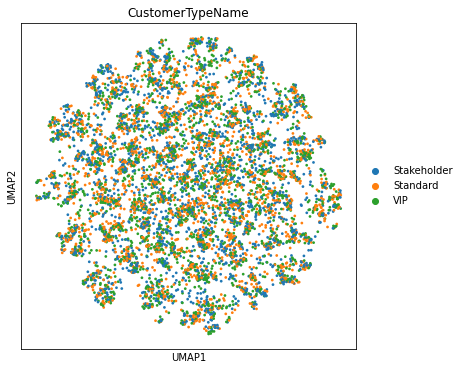

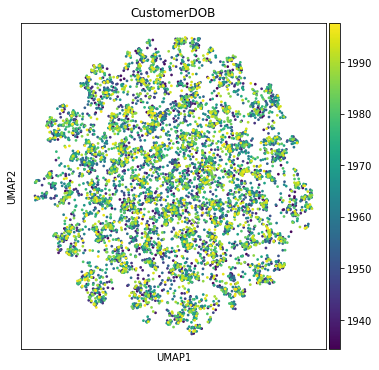

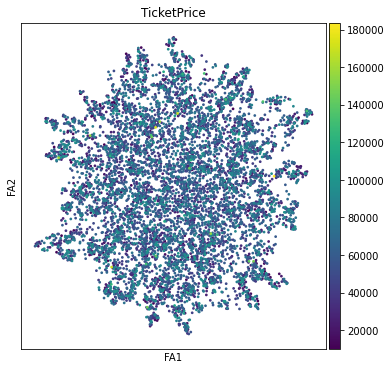

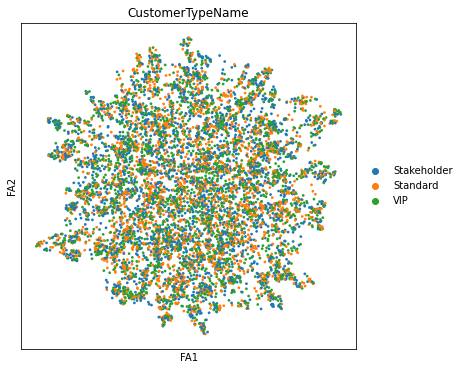

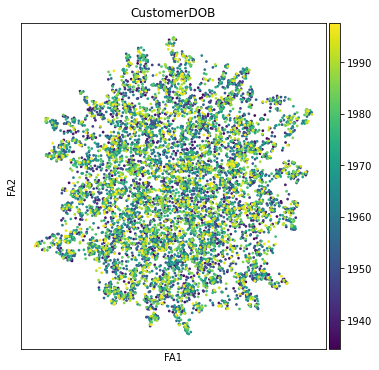

In [275]:
# plot them on these new visualizations
for col in adata.obs.columns[:1]:
    fig,ax = plt.subplots(figsize=[6,6])
    sc.pl.tsne(adata, color=[col], s=30, ax=ax)
for col in anno.columns:
    fig,ax = plt.subplots(figsize=[6,6])
    sc.pl.tsne(adata, color=[col], ax=ax, s=30)
    
for col in adata.obs.columns[:1]:
    fig,ax = plt.subplots(figsize=[6,6])
    sc.pl.diffmap(adata, color=[col], s=30, ax=ax)
for col in anno.columns:
    fig,ax = plt.subplots(figsize=[6,6])
    sc.pl.diffmap(adata, color=[col], ax=ax, s=30)
    
for col in adata.obs.columns[:1]:
    fig,ax = plt.subplots(figsize=[6,6])
    sc.pl.umap(adata, color=[col], s=30, ax=ax)
for col in anno.columns:
    fig,ax = plt.subplots(figsize=[6,6])
    sc.pl.umap(adata, color=[col], ax=ax, s=30)
    
for col in adata.obs.columns[:1]:
    fig,ax = plt.subplots(figsize=[6,6])
    sc.pl.draw_graph(adata, color=[col], s=30, ax=ax)
for col in anno.columns:
    fig,ax = plt.subplots(figsize=[6,6])
    sc.pl.draw_graph(adata, color=[col], ax=ax, s=30)
    